In [1]:
from yahoo_fantasy_api import League, Team
from yahoo_oauth import OAuth2
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.data_collection import *

In [2]:
oauth = OAuth2(None, None, from_file='../auth/oauth2yahoo.json')
league = League(oauth, league_id='461.l.6288') #game_key.l.leauge_key

[2025-11-25 16:27:07,845 DEBUG] [yahoo_oauth.oauth.__init__] Checking 
[2025-11-25 16:27:07,846 DEBUG] [yahoo_oauth.oauth.token_is_valid] ELAPSED TIME : 62.15925621986389
[2025-11-25 16:27:07,847 DEBUG] [yahoo_oauth.oauth.token_is_valid] TOKEN IS STILL VALID


In [3]:
team = get_team_from_num(oauth, 12, 7)

In [4]:
# total_weeks = 17
# player_id_list = team['player_id'].tolist()
# weekly_data = pd.DataFrame(team['name'])
# print(weekly_data)
# week_1_data = league.player_stats(player_id_list, req_type='week', week=1)
# print(week_1_data['total_points'].tolist())
# weekly_data = pd.concat([week_1_data['name'], week_1_data['total_points']], axis=1, keys=['name', '1'])
# for i in range(1, 17):
    # new_week = league.player_stats(player_id_list, req_type='week', week=i)
    # new_week = pd.json_normalize(new_week)
    # new_week['total_points'] = pd.to_numeric(new_week['total_points'])
    # new_totals = new_week['total_points'].tolist()
    
    # weekly_data.insert(i, str(i), new_totals, True)
# print(weekly_data)

# print(get_weekly_totals(league, team))

In [5]:
weekly_totals = get_weekly_totals(league, team)
print(weekly_totals)

                  name     1      2      3      4      5      6      7     8  \
23        Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
7       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
19      Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
9       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
13      Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
4        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
6             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
2           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
28     Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
10       Ja'Marr Chase   4.6  37.50   9.90   7.30  32.00  25.10  38.10  21.1   
18   Ja'Tavion Sanders   5.7  12.40   3.10   0.00   0.00   0.00   1.00   5.9   
5        Jake Ferguson   7.3  16.80  21.

In [6]:
# weekly_totals['name']

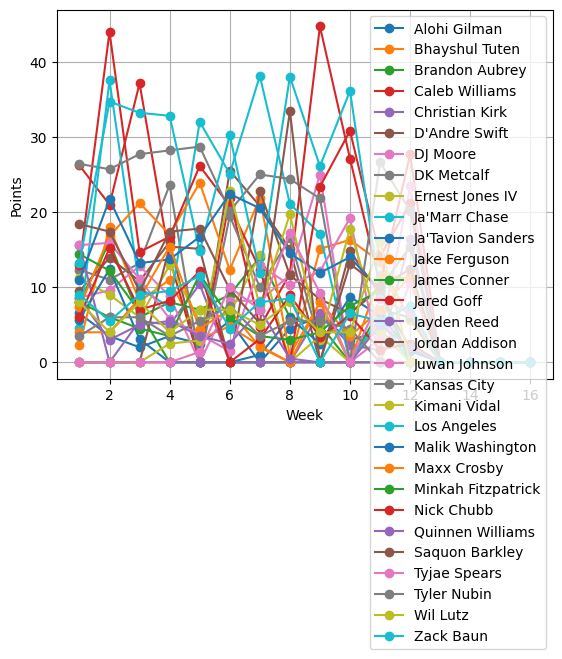

In [7]:
weekly_totals_long = weekly_totals.melt(id_vars='name', var_name='week', value_name='points')
weekly_totals_long['week'] = weekly_totals_long['week'].astype(int)
for name, group in weekly_totals_long.groupby('name'):
    plt.plot(group['week'], group['points'], marker = 'o', label=name)
plt.xlabel("Week")
plt.ylabel("Points")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
team_stats = get_team_yearly_stats(league, team)
wrs = get_position_stats(team_stats, 'DB')

In [9]:
wr_weekly = get_weekly_totals(league, wrs)
print(wr_weekly)

                  name    1    2    3    4     5    6    7    8    9   10  \
23        Alohi Gilman  6.5  3.5  2.0  3.5   2.5  5.5  0.0  4.5  6.1  3.0   
27  Minkah Fitzpatrick  8.0  6.0  4.5  3.5  11.7  6.0  3.5  3.0  4.0  7.5   
26         Tyler Nubin  3.5  6.0  6.0  3.5   5.5  7.5  3.5  5.5  5.5  4.5   

     11   12   13   14   15   16  
23  4.0  1.5  0.0  0.0  0.0  0.0  
27  9.5  0.0  0.0  0.0  0.0  0.0  
26  0.0  0.0  0.0  0.0  0.0  0.0  


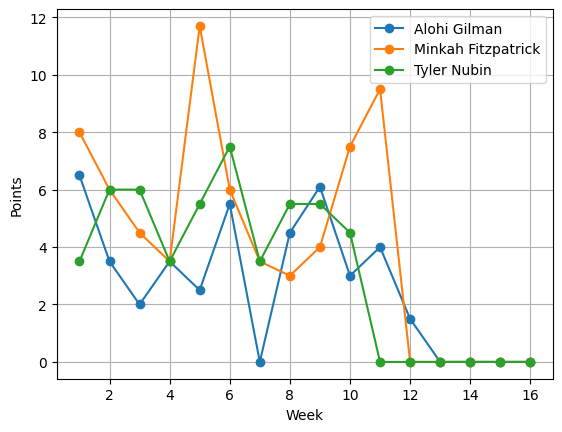

In [10]:
weekly_wr_totals_long = wr_weekly.melt(id_vars='name', var_name='week', value_name='points')
weekly_wr_totals_long['week'] = weekly_wr_totals_long['week'].astype(int)
for name, group in weekly_wr_totals_long.groupby('name'):
    plt.plot(group['week'], group['points'], marker = 'o', label=name)
plt.xlabel("Week")
plt.ylabel("Points")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# df = pd.read_csv('/Users/your_user_name/Documents/Projects/my_project_1.csv')
projections = pd.read_csv('/home/anowakowski/programming/boot-dev-work/fantasy_football_analytics/data/projections_2025.csv')

In [12]:
print(projections)

                  name      1      2      3      4      5      6      7  \
0         Alohi Gilman   4.89   7.89   5.04   5.09   5.19   0.00   0.00   
1       Bhayshul Tuten   5.27   6.78   7.41   6.83   6.00   5.86   5.50   
2       Brandon Aubrey   7.43   8.57   8.24   7.40   7.67   7.95   8.27   
3       Caleb Williams  18.35  19.30  20.94  18.97   0.00  17.76  19.42   
4       Christian Kirk   7.24   0.00  10.29  10.57   9.25   0.00   0.00   
5        D'Andre Swift  11.99  12.01  12.05  11.39   0.00  11.36  12.49   
6             DJ Moore  15.67  15.62  15.54  13.80   0.00  11.83  12.65   
7           DK Metcalf  13.93  15.50  14.41  13.63   0.00  13.66  14.82   
8      Ernest Jones IV   6.68   6.37   7.07   6.85   7.03   7.07   6.80   
9        Ja'Marr Chase  20.41  22.29  18.91  18.59  19.34  18.29  19.51   
10   Ja'Tavion Sanders   6.01   6.55   8.44   0.00   0.00   0.00   5.87   
11       Jake Ferguson   8.95   8.37  10.08  12.37  11.76  13.11  11.26   
12        James Conner  1

In [13]:
# projections_margin = pd.DataFrame(projections['name'])
# week_1_margin = (weekly_totals['1'] - projections['1'])
# margin = week_1_margin.to_list()
# projections_margin.insert(1, '1', margin, True)

In [14]:
# print(projections_margin.head())

In [15]:
weekly_totals = get_weekly_totals(league, team)
print(weekly_totals)

                  name     1      2      3      4      5      6      7     8  \
23        Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
7       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
19      Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
9       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
13      Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
4        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
6             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
2           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
28     Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
10       Ja'Marr Chase   4.6  37.50   9.90   7.30  32.00  25.10  38.10  21.1   
18   Ja'Tavion Sanders   5.7  12.40   3.10   0.00   0.00   0.00   1.00   5.9   
5        Jake Ferguson   7.3  16.80  21.

In [16]:
# weekly_totals = weekly_totals.set_index("name").sort_index()
weekly_totals = weekly_totals.reset_index(drop=True)
print(weekly_totals)

                  name     1      2      3      4      5      6      7     8  \
0         Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
1       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
2       Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
3       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
4       Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
5        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
6             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
7           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
8      Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
9        Ja'Marr Chase   4.6  37.50   9.90   7.30  32.00  25.10  38.10  21.1   
10   Ja'Tavion Sanders   5.7  12.40   3.10   0.00   0.00   0.00   1.00   5.9   
11       Jake Ferguson   7.3  16.80  21.

In [17]:
curr_week = 12
projections_margin = pd.DataFrame(projections['name'])
# weekly_totals = weekly_totals.set_index("name").sort_index()
# weekly_sorted = weekly_sorted.reset_index()
# projections_sorted = projections.set_index("name").sort_index()
print(weekly_totals)

                  name     1      2      3      4      5      6      7     8  \
0         Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
1       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
2       Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
3       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
4       Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
5        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
6             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
7           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
8      Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
9        Ja'Marr Chase   4.6  37.50   9.90   7.30  32.00  25.10  38.10  21.1   
10   Ja'Tavion Sanders   5.7  12.40   3.10   0.00   0.00   0.00   1.00   5.9   
11       Jake Ferguson   7.3  16.80  21.

In [18]:

# print(weekly_totals[['1','2']].head())
# print(projections[['1','2']].head())
for i in range(1,curr_week+1):
    week_margin = (weekly_totals[str(i)] - projections[str(i)]) 
    # print(week_margin.head())
    margin = week_margin.to_list()
    projections_margin.insert(i, str(i), margin, True)
print(projections_margin)

                  name      1      2      3      4      5      6      7  \
0         Alohi Gilman   1.61  -4.39  -3.04  -1.59  -2.69   5.50   0.00   
1       Bhayshul Tuten  -2.97  11.22   0.69   4.17  -2.90  -1.06  -3.30   
2       Brandon Aubrey   0.57   7.43  -2.24   0.60  -0.67   1.05   5.73   
3       Caleb Williams   7.85   1.68  16.18  -5.19   0.00   4.12 -14.74   
4       Christian Kirk  -7.24   0.00  -4.79  -5.57   1.15   0.00   0.00   
5        D'Andre Swift  -2.49   1.89  -1.25   4.61   0.00  14.14   8.31   
6             DJ Moore  -7.07  -6.02  -2.74  -5.00   0.00  -3.63  -4.45   
7           DK Metcalf  -1.63  -4.50  -1.21   9.97   0.00   5.84  -4.82   
8      Ernest Jones IV   4.52   2.63  -1.07   6.05  -1.53  -0.57   7.50   
9        Ja'Marr Chase -15.81  15.21  -9.01 -11.29  12.66   6.81  18.59   
10   Ja'Tavion Sanders  -0.31   5.85  -5.34   0.00   0.00   0.00  -4.87   
11       Jake Ferguson  -1.65   8.43  11.12   4.63  12.14  -0.81  10.64   
12        James Conner  -

In [19]:
print(projections_margin)

                  name      1      2      3      4      5      6      7  \
0         Alohi Gilman   1.61  -4.39  -3.04  -1.59  -2.69   5.50   0.00   
1       Bhayshul Tuten  -2.97  11.22   0.69   4.17  -2.90  -1.06  -3.30   
2       Brandon Aubrey   0.57   7.43  -2.24   0.60  -0.67   1.05   5.73   
3       Caleb Williams   7.85   1.68  16.18  -5.19   0.00   4.12 -14.74   
4       Christian Kirk  -7.24   0.00  -4.79  -5.57   1.15   0.00   0.00   
5        D'Andre Swift  -2.49   1.89  -1.25   4.61   0.00  14.14   8.31   
6             DJ Moore  -7.07  -6.02  -2.74  -5.00   0.00  -3.63  -4.45   
7           DK Metcalf  -1.63  -4.50  -1.21   9.97   0.00   5.84  -4.82   
8      Ernest Jones IV   4.52   2.63  -1.07   6.05  -1.53  -0.57   7.50   
9        Ja'Marr Chase -15.81  15.21  -9.01 -11.29  12.66   6.81  18.59   
10   Ja'Tavion Sanders  -0.31   5.85  -5.34   0.00   0.00   0.00  -4.87   
11       Jake Ferguson  -1.65   8.43  11.12   4.63  12.14  -0.81  10.64   
12        James Conner  -

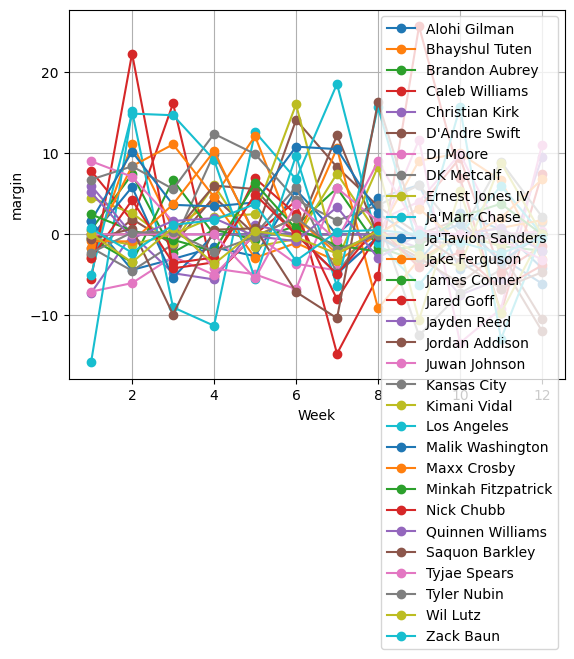

In [20]:
projections_margin_long = projections_margin.melt(id_vars='name', var_name='week', value_name='margin')
projections_margin_long['week'] = projections_margin_long['week'].astype(int)
for name, group in projections_margin_long.groupby('name'):
    plt.plot(group['week'], group['margin'], marker = 'o', label=name)
plt.xlabel("Week")
plt.ylabel("margin")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
new_weekly_totals = get_weekly_totals(league, team)
function_margins = calculate_margin(new_weekly_totals, projections, 12)
print(function_margins)

                  name      1      2      3      4      5      6      7  \
0         Alohi Gilman   1.61  -4.39  -3.04  -1.59  -2.69   5.50   0.00   
1       Bhayshul Tuten  -2.97  11.22   0.69   4.17  -2.90  -1.06  -3.30   
2       Brandon Aubrey   0.57   7.43  -2.24   0.60  -0.67   1.05   5.73   
3       Caleb Williams   7.85   1.68  16.18  -5.19   0.00   4.12 -14.74   
4       Christian Kirk  -7.24   0.00  -4.79  -5.57   1.15   0.00   0.00   
5        D'Andre Swift  -2.49   1.89  -1.25   4.61   0.00  14.14   8.31   
6             DJ Moore  -7.07  -6.02  -2.74  -5.00   0.00  -3.63  -4.45   
7           DK Metcalf  -1.63  -4.50  -1.21   9.97   0.00   5.84  -4.82   
8      Ernest Jones IV   4.52   2.63  -1.07   6.05  -1.53  -0.57   7.50   
9        Ja'Marr Chase -15.81  15.21  -9.01 -11.29  12.66   6.81  18.59   
10   Ja'Tavion Sanders  -0.31   5.85  -5.34   0.00   0.00   0.00  -4.87   
11       Jake Ferguson  -1.65   8.43  11.12   4.63  12.14  -0.81  10.64   
12        James Conner  -

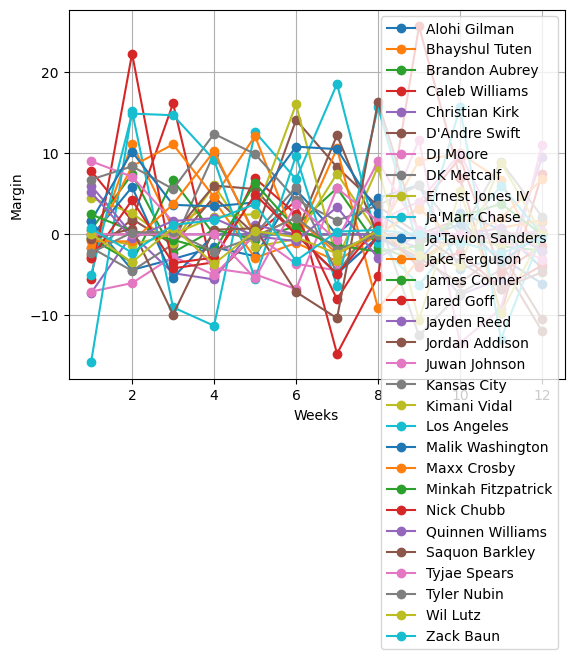

In [22]:
create_weekly_line_graph(function_margins, 'Weeks', 'Margin')